# Python Notebook

## 1. Version Information and Modules

In [1]:
import sys
sys.version

'3.9.6 (default, Sep  1 2021, 01:10:40) \n[Clang 12.0.5 (clang-1205.0.22.9)]'

In [2]:
import math
import numpy as np
from timeit import timeit
from matplotlib import pyplot as plt
from gtda.homology import VietorisRipsPersistence, WeakAlphaPersistence
from gtda.plotting import plot_diagram
import gudhi as gd
%matplotlib inline

## 2. Function to generate sample points

In [3]:
def _randomPointCircle(sigma=0.05):
    t = 2 * math.pi * np.random.rand()
    return [math.cos(t) + (sigma * np.random.randn()), math.sin(t) + (sigma * np.random.randn())]


def randCircle(n=100, sigma=0.05):
    return np.array([_randomPointCircle(sigma) for _ in range(n)])

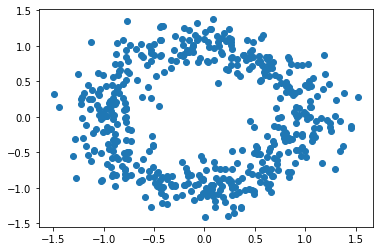

In [4]:
X = randCircle(n=500, sigma=0.2)
plt.scatter([X[:, 0]], [X[:, 1]])
plt.show()

## 3. Define Persistence Diagram Methods

### 3a. Using GTDA


In [5]:
VR1 = VietorisRipsPersistence(
    homology_dimensions=[0, 1, 2], collapse_edges=False, max_edge_length=3)
ECVR1 = VietorisRipsPersistence(
    homology_dimensions=[0, 1, 2], collapse_edges=True, max_edge_length=3)
Alpha1 = WeakAlphaPersistence(homology_dimensions=[0, 1, 2], max_edge_length=3)

### 3a. Using Gudhi

In [6]:
def VR2(X):
    return gd.RipsComplex(points=X, max_edge_length=3.0).create_simplex_tree(max_dimension=2).persistence()

# Edge Collapse in this Library seems to be broken!


def ECVR2(X):
    return gd.RipsComplex(points=X, max_edge_length=3.0).create_simplex_tree(max_dimension=2).collapse_edges().persistence()


def Alpha2(X):
    return gd.AlphaComplex(points=X).create_simplex_tree().persistence()

## 4. Compute Persistence Diagrams

### 4a. Runtime Comparisons

In [7]:
print("\n")
print(timeit("VR1.fit_transform([X])", globals=globals(), number=1))
print(timeit("VR2(X)", globals=globals(), number=1))
print("\n")
print(timeit("ECVR1.fit_transform([X])", globals=globals(), number=1))
print("\n")
print(timeit("Alpha1.fit_transform([X])", globals=globals(), number=1))
print(timeit("Alpha2(X)", globals=globals(), number=1))




18.993081525999997
17.602885373


1.1968901650000063


0.0058321079999998915
0.01083272999999707


### 4b. GTDA Persistence Diagrams

In [8]:
D11 = VR1.fit_transform([X])
D12 = ECVR1.fit_transform([X])
D13 = Alpha1.fit_transform([X])

In [10]:
plot_diagram(D11[0])

In [12]:
plot_diagram(D12[0])

In [13]:
plot_diagram(D13[0])

### 4c. Gudhi Persistence Diagrams

In [15]:
D21 = VR2(X)
D23 = Alpha2(X)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

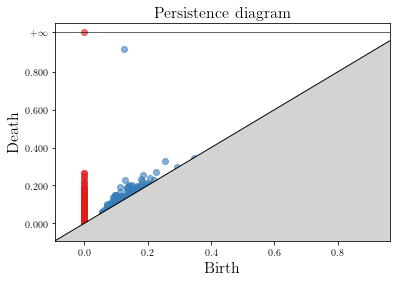

In [16]:
gd.plot_persistence_diagram(D21)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

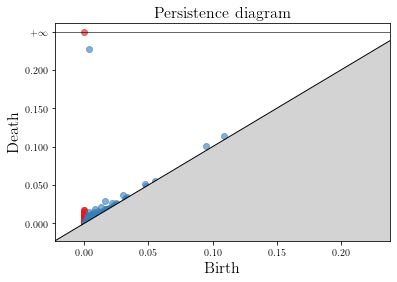

In [19]:
gd.plot_persistence_diagram(D23)